# Recuperación de Información (Information Retrieval)


## Conceptos básicos

### <u>Documentos</u>

En nuestro curso nos limitaremos a la recuperación de información en colecciones de textos a los cuales llamaremos <b>documentos</b>


In [ ]:
# algunos ejemplos de documentos básicos que pueden 
#ser representados como cadenas de caracteres

d1 = "... Las habilidades que los niños necesitan en relación\
 con los medios digitales no se limitan a la recuperación de información ..."
d2 = "... como el procesamiento de datos, el desarrollo y la recuperación de información\
 son ejemplos de posibles áreas de cambio ..."
d3 = "... la enumeración de varios nombres puede aumentar las probabilidades de recuperación ..."
d4 = "... Usar estructuras cognitivas facilita la recuperación y la actualización de\
 las bases de conocimiento a través de los puntos clave ..."
d5 = "... en su defecto la fecha de efectos aplicada en ausencia de otra información\
 fue la de solicitud ..."

### <u>Colección</u>

Llamaremos <b>colección</b> a un conjunto de documentos. Observa que los documentos d1, d2, d3, d4 y d5 forman una colección

In [ ]:
#podemos formar la colección de documentos mediante un diccionario
colecc = {'d1':d1, 'd2':d2, 'd3':d3, 'd4':d4, 'd5':d5}

In [ ]:
print(colecc['d3'])

... la enumeración de varios nombres puede aumentar las probabilidades de recuperación ...




### <u> Bolsa de palabras</u>

Una documento puede representarse como una <b>bolsa de palabras</b>. Básicamente es un conjunto que contiene a cada palabra presente en el documento. Con esta representación se pierde la información correspondiente al orden en el cual se presentan las palabras en un documento.

A las palabras también se les conoce como <b>términos</b>

In [ ]:
# construcción de la bolsa de palabras de un documento
sp = d2.split(" ") #suponemos que las palabras están separadas por espacios 
bp = set(sp)

for e in bp:
    print(e)

el
procesamiento
ejemplos
de
posibles
como
la
son
cambio
áreas
recuperación
datos,
información
...
y
desarrollo


Podemos definir una función que construya la bolsa de palabras de un documento 
ya que es un proceso que se utilizará con frecuencia


In [ ]:
# Primera versión
def bag_of_words(d): #recibe un documento cualquiera
    #removemos algunos signos de puntuación
    sigs = [',', '.', ':', ';']
    dc = d
    for s in sigs:
        dc = dc.replace(s,"")
    
    #dividimos las palabras por medio de los espacios y las convertimos a minúsculas para uniformizar
    sp = dc.split(" ")
    bw = set(sp)
    bw = [w.lower() for w in bw]
    return bw    

Podemos utilizar la función para extraer la bolsa de palabras de cualquier documento de la colección


In [ ]:
bw = bag_of_words(colecc['d2'])

for w in bw:
    print(w)
    


procesamiento
el
ejemplos
de
posibles
como
la
son
cambio
áreas
recuperación
información
y
datos
desarrollo


### <u>Vocabulario</u>

Conjunto de términos presentes en los documentos de una colección

In [ ]:
# construimos el vocabulario guardando en un conjunto los términos de 
# todos los documentos en la colección

voc = set()

for d in colecc:
    bw = bag_of_words(colecc[d])
    voc = voc.union(bw)

for e in voc:
    print(e)


necesitan
ausencia
con
fue
efectos
defecto
digitales
niños
facilita
medios
probabilidades
puntos
relación
desarrollo
aplicada
el
ejemplos
habilidades
en
a
cognitivas
limitan
la
puede
nombres
recuperación
varios
información
solicitud
las
que
procesamiento
otra
usar
de
clave
cambio
fecha
estructuras
través
enumeración
aumentar
y
conocimiento
se
no
como
son
bases
los
áreas
actualización
su
datos
posibles


## Preprocesamiento



### <u> Stop Words</u>

Es una práctica común el ignorar palabras que aparecen con mucha frecuencia en los documentos y que pueden aportar muy poca información al proceso de búsqueda, por ejemplo: los artículos, las preposiciones, pronombres, conectivos, etc.

Por ejemplo, al construir la bolsa de palabras podríamos ignorar las siguientes: <b> son, en, el, la los, de, las, a, y, que,...</b> A dichas palabras se les conoce en inglés como <b>stop words</b>. 

In [ ]:
#segunda versión
def bag_of_words(d):
    stop_words = ["son", "el", "la", "los", "de", "las", "a", "y", "que", "en", "se", "su", "fue", "no", 
              "con", "como"]

    #removemos los signos de puntuación
    sigs = [',', '.', ':', ';']
    dc = d
    for s in sigs:
        dc = dc.replace(s,"")
    
    #dividimos las palabras por medio de los espacios   
    sp = dc.split(" ")
    bw = set() #conjunto vacío
    
    #y agregamos cada palabra (en minúsculas)
    #a la bolsa siempre y cuando no sea una stop word 
    for w in sp:
        nw = w.lower()
        #remueve algunos caracteres especiales que pueden estar presentes en las palabras
        nw = nw.replace(" ",'')
        nw = nw.replace("\n",'')
        nw = nw.replace('"','')
        nw = nw.replace('(','')
        nw = nw.replace(')','')
        if not nw in stop_words:
            bw.add(nw)
    
    return bw    

In [ ]:
# construimos un vocabulario guardando en un conjunto los términos de 
# todos los documentos en la colección
    
#una vez construido el vocabulario removemos las stop-words

voc = set()

for d in colecc:
    bw = bag_of_words(colecc[d])
    voc = voc.union(bw)

for e in voc:
    print(e)


necesitan
ausencia
efectos
defecto
digitales
niños
facilita
medios
probabilidades
puntos
relación
desarrollo
aplicada
ejemplos
habilidades
cognitivas
limitan
puede
nombres
recuperación
varios
información
solicitud
procesamiento
otra
usar
clave
cambio
fecha
estructuras
través
enumeración
aumentar
datos
bases
áreas
actualización
conocimiento
posibles


### <u>Acentos</u>

Para uniformizar las palabras, podemos excluir a los acentos (no siempre los autores respetan la ortografía).

In [ ]:
#tercera versión
def bag_of_words(d):
    stop_words = ["son", "el", "la", "los", "de", "las", "a", "y", "que", "en", "se", "su", "fue", "no", 
              "con", "como"]

    #removemos los signos de puntuación y caracteres especiales
    sigs = [',', '.', ':', ';' " ", "\n",'"', '(', ')']
    dc = d
    for s in sigs:
        dc = dc.replace(s,"")
    
    #dividimos las palabras por medio de los espacios   
    sp = dc.split(" ")
    bw = set() #conjunto vacío
    
    #y agregamos cada palabra (en minúsculas)
    #a la bolsa siempre y cuando no sea una stop word 
    for w in sp:
        nw = w.lower()
        #remueve acentos
        nw = nw.replace('á','a')
        nw = nw.replace('é','e')
        nw = nw.replace('í','i')
        nw = nw.replace('ó','o')
        nw = nw.replace('ú','u')
        nw = nw.replace('ñ','n')
        if not nw in stop_words:
            bw.add(nw)
    
    return bw    

Al uniformizar las palabras evitamos que diferentes versiones de un mismo término aparezcan en el vocabulario (algunas con acento, otras sin acento).

In [ ]:
voc = set()

for d in colecc:
    bw = bag_of_words(colecc[d])
    voc = voc.union(bw)

for e in voc:
    print(e)


necesitan
traves
ausencia
efectos
defecto
enumeracion
digitales
facilita
informacion
medios
probabilidades
puntos
desarrollo
aplicada
ejemplos
habilidades
cognitivas
limitan
puede
nombres
varios
solicitud
procesamiento
areas
otra
ninos
usar
clave
cambio
fecha
estructuras
actualizacion
datos
aumentar
relacion
bases
conocimiento
posibles
recuperacion


Es recomendable separar el preprocesameinto de la construcción de la bolsa de palabras:

In [ ]:
def pre_proceso(d):
  #convierte a minúsculas
  nw = d.lower()
  #elimina acentos, caracteres especiales o signos de puntuación
  nw = nw.replace("\n",'')
  nw = nw.replace('"','')
  nw = nw.replace('(','')
  nw = nw.replace(')','')
  nw = nw.replace('.','')
  nw = nw.replace(',','')
  nw = nw.replace(';','')
  nw = nw.replace(':','')
  nw = nw.replace('á','a')
  nw = nw.replace('é','e')
  nw = nw.replace('í','i')
  nw = nw.replace('ó','o')
  nw = nw.replace('ú','u')
  nw = nw.replace('ñ','n')

  return nw

def bag_of_words(d):
  stop_words = ["son", "el", "la", "los", "de", "las", "a", "y", "que", "en", "se", "su", "fue", "no", 
            "con", "como", ""]

  #dividimos las palabras por medio de los espacios   
  sp = d.split(" ")
  bw = set() #conjunto vacío
  
  #y agregamos cada palabra 
  #a la bolsa siempre y cuando no sea una stop word 
  for w in sp:
      if not w in stop_words:
          bw.add(w)
  
  return bw    

def vocabulario(colecc):
  voc = set()

  for d in colecc:
      bw = bag_of_words(colecc[d])
      voc = voc.union(bw)
  return voc

In [ ]:
# preprocesamos cada documento de la colección
for d in colecc:
  colecc[d] = pre_proceso(colecc[d])

# formamos el vocabulario
voc = vocabulario(colecc)
colecc['d1']

' las habilidades que los ninos necesitan en relacion con los medios digitales no se limitan a la recuperacion de informacion '

In [ ]:
voc

{'actualizacion',
 'aplicada',
 'areas',
 'aumentar',
 'ausencia',
 'bases',
 'cambio',
 'clave',
 'cognitivas',
 'conocimiento',
 'datos',
 'defecto',
 'desarrollo',
 'digitales',
 'efectos',
 'ejemplos',
 'enumeracion',
 'estructuras',
 'facilita',
 'fecha',
 'habilidades',
 'informacion',
 'limitan',
 'medios',
 'necesitan',
 'ninos',
 'nombres',
 'otra',
 'posibles',
 'probabilidades',
 'procesamiento',
 'puede',
 'puntos',
 'recuperacion',
 'relacion',
 'solicitud',
 'traves',
 'usar',
 'varios'}

## Consultas

Es una lista de términos que refleja la necesidad de información que tiene un usuario del sistema de recuperación de información.

Procesamos la frase escrita en la consulta de la misma forma que procesamos los documentos de la colección (construimos la bolsa de palabras):

In [ ]:
# ejemplo de consulta
qry = "Recuperación de la información"
qry = pre_proceso(qry)
bw = bag_of_words(qry)
for w in bw:
    print(w)

informacion
recuperacion


### <u>Modelo booleano</u>
A partir de los términos de la consulta debemos seleccionar los documentos que sean relevantes.



In [ ]:
# buscamos los documentos relevantes de acuerdo a la consulta

tr_inf = set()
#buscamos los documentos que contengan el término "información"
for d in colecc:
    if "informacion" in colecc[d]:
        tr_inf.add(d)

tr_rec = set()
#buscamos los documentos que contengan el término "recuperación"
for d in colecc:
    if "recuperacion" in colecc[d]:
        tr_rec.add(d)
        
print("Documentos que contienen el término 'información': ")
print(tr_inf)

print("Documentos que contienen el término 'recuperación': ")
print(tr_rec)

Documentos que contienen el término 'información': 
{'d2', 'd5', 'd1'}
Documentos que contienen el término 'recuperación': 
{'d3', 'd4', 'd2', 'd1'}


Los términos de la consulta pueden combinarse mediante operadores lógicos, por ejemplo

#### <u>Usando el conectivo AND</u>
 

In [ ]:
# Consulta "información" Y "recuperación"
print("Resultados: \n\n")
res = tr_inf.intersection(tr_rec)
for r in res:    
    print(colecc[r])
    print("\n")

Resultados: 


 como el procesamiento de datos el desarrollo y la recuperacion de informacion son ejemplos de posibles areas de cambio 


 las habilidades que los ninos necesitan en relacion con los medios digitales no se limitan a la recuperacion de informacion 




El resultado de la consulta contiene solamente a los documentos d1 y d2

#### <u>Usando el conectivo OR</u>

In [ ]:
# Consulta "información" O "recuperación"
print("Resultados: \n\n")
res = tr_inf.union(tr_rec)
for r in res:    
    print(colecc[r])
    print("\n")

Resultados: 


 como el procesamiento de datos el desarrollo y la recuperacion de informacion son ejemplos de posibles areas de cambio 


 en su defecto la fecha de efectos aplicada en ausencia de otra informacion fue la de solicitud 


 la enumeracion de varios nombres puede aumentar las probabilidades de recuperacion 


 usar estructuras cognitivas facilita la recuperacion y la actualizacion de las bases de conocimiento a traves de los puntos clave 


 las habilidades que los ninos necesitan en relacion con los medios digitales no se limitan a la recuperacion de informacion 




#### <u>Usando la *diferencia*</u>

In [ ]:
# Consulta "información" - "recuperación"
print("Resultados: \n\n")
res = tr_inf.difference(tr_rec)
for r in res:    
    print(colecc[r])
    print("\n")

Resultados: 


 en su defecto la fecha de efectos aplicada en ausencia de otra informacion fue la de solicitud 




## Índice Invertido

Observa que para responder a una consulta hemos recorrido cada documento seleccionando aquellos que contengan algún término en particular. Esta estrategia es muy ineficiente sobre todo si consideramos que la colección puede llegar a contener miles, o hasta millones de documentos.  

Una mejor opción consiste en construir una tabla en la que coloquemos cada término del vocabulario en un renglón junto con la lista de documentos en los que el término aparece. A esta tabla se le conoce como <b>índice invertido</b>. Utilizando el índice invertido, para responder a una consulta solamente se debe buscar el término en el índice y una vez localizado se recupera la lista de documentos en los que aparece.

Este proceso es ventajoso cuando la magnitud del vocabulario es mucho menor que la cantidad de documentos de la colección.

In [ ]:
# construcción del índice invertido 

ind_invrt = {}

#recorremos cada documento
for d in colecc:
    bw = bag_of_words(colecc[d])
    for t in bw:
        if not t in ind_invrt: # si el término no está en el índice construye una nueva entrada
            ind_invrt[t] = set([d])
        else:
            ind_invrt[t].add(d)

for t in ind_invrt:
    print(t, ind_invrt[t])

necesitan {'d1'}
ninos {'d1'}
habilidades {'d1'}
relacion {'d1'}
digitales {'d1'}
limitan {'d1'}
informacion {'d2', 'd5', 'd1'}
medios {'d1'}
recuperacion {'d3', 'd4', 'd2', 'd1'}
procesamiento {'d2'}
areas {'d2'}
ejemplos {'d2'}
posibles {'d2'}
cambio {'d2'}
datos {'d2'}
desarrollo {'d2'}
enumeracion {'d3'}
puede {'d3'}
nombres {'d3'}
varios {'d3'}
probabilidades {'d3'}
aumentar {'d3'}
traves {'d4'}
usar {'d4'}
cognitivas {'d4'}
clave {'d4'}
bases {'d4'}
facilita {'d4'}
estructuras {'d4'}
actualizacion {'d4'}
puntos {'d4'}
conocimiento {'d4'}
ausencia {'d5'}
otra {'d5'}
efectos {'d5'}
defecto {'d5'}
fecha {'d5'}
solicitud {'d5'}
aplicada {'d5'}


El índice invertido reduce la respuesta a la consulta a una simple lectura de un elemento de un diccionario.

In [ ]:
# Una consulta ahora puede ser realizada a través del índice

q = "informacion"

if q in ind_invrt.keys():
  res = ind_invrt[q] #simplemente leemos la lista de documentos en los que aparece el término 

  #imprimimos la lista de documentos en los que está presente el término
  for d in res:    
      print(colecc[d])
      print("\n")

 como el procesamiento de datos el desarrollo y la recuperacion de informacion son ejemplos de posibles areas de cambio 


 en su defecto la fecha de efectos aplicada en ausencia de otra informacion fue la de solicitud 


 las habilidades que los ninos necesitan en relacion con los medios digitales no se limitan a la recuperacion de informacion 




## Modelo vectorial

### <u>Frecuencia de término</u>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#cuenta las veces ue aparece un término en cada documento

def term_frequency(d, voc):
  bw = bag_of_words(d)
  tf = np.zeros(len(voc))
  for w in bw:
    if w in voc:
      i = voc.index(w)
      if i >= 0:
        tf[i] += 1
  return tf

**Representamos cada documento como un vector**

In [ ]:
voc = list(voc)
tf = term_frequency(colecc['d2'], voc)
tf = pd.Series(tf, index=voc)
tf

necesitan         0.0
traves            0.0
ausencia          0.0
efectos           0.0
defecto           0.0
enumeracion       0.0
digitales         0.0
facilita          0.0
informacion       1.0
medios            0.0
probabilidades    0.0
puntos            0.0
desarrollo        1.0
aplicada          0.0
ejemplos          1.0
habilidades       0.0
cognitivas        0.0
limitan           0.0
puede             0.0
nombres           0.0
varios            0.0
solicitud         0.0
procesamiento     1.0
areas             1.0
otra              0.0
ninos             0.0
usar              0.0
clave             0.0
cambio            1.0
fecha             0.0
estructuras       0.0
actualizacion     0.0
datos             1.0
aumentar          0.0
relacion          0.0
bases             0.0
conocimiento      0.0
posibles          1.0
recuperacion      1.0
dtype: float64

### <u>Frecuencia inversa de documento</u>

In [ ]:
idf = np.zeros(len(voc))

for w in voc:
  i = voc.index(w)
  for d in colecc:
    if colecc[d].find(w) >= 0:
      idf[i] += 1
N = len(colecc)
S_idf = np.log(N/pd.Series(idf, index=voc))
S_idf

necesitan         1.609438
traves            1.609438
ausencia          1.609438
efectos           1.609438
defecto           1.609438
enumeracion       1.609438
digitales         1.609438
facilita          1.609438
informacion       0.510826
medios            1.609438
probabilidades    1.609438
puntos            1.609438
desarrollo        1.609438
aplicada          1.609438
ejemplos          1.609438
habilidades       1.609438
cognitivas        1.609438
limitan           1.609438
puede             1.609438
nombres           1.609438
varios            1.609438
solicitud         1.609438
procesamiento     1.609438
areas             1.609438
otra              1.609438
ninos             1.609438
usar              1.609438
clave             1.609438
cambio            1.609438
fecha             1.609438
estructuras       1.609438
actualizacion     1.609438
datos             1.609438
aumentar          1.609438
relacion          1.609438
bases             1.609438
conocimiento      1.609438
p

In [ ]:
np.log(5)

1.6094379124341003

In [ ]:
len(colecc)

In [ ]:
np.log(len(voc))

### <u>TF-IDF </u>
Representamos a cada documento con el producto del vector de frecuencia de término por el de frecuencia inversa de documento:

In [ ]:
tf = term_frequency(colecc['d5'], voc)
tf*S_idf #vector tf-idf

necesitan         0.000000
traves            0.000000
ausencia          1.609438
efectos           1.609438
defecto           1.609438
enumeracion       0.000000
digitales         0.000000
facilita          0.000000
informacion       0.510826
medios            0.000000
probabilidades    0.000000
puntos            0.000000
desarrollo        0.000000
aplicada          1.609438
ejemplos          0.000000
habilidades       0.000000
cognitivas        0.000000
limitan           0.000000
puede             0.000000
nombres           0.000000
varios            0.000000
solicitud         1.609438
procesamiento     0.000000
areas             0.000000
otra              1.609438
ninos             0.000000
usar              0.000000
clave             0.000000
cambio            0.000000
fecha             1.609438
estructuras       0.000000
actualizacion     0.000000
datos             0.000000
aumentar          0.000000
relacion          0.000000
bases             0.000000
conocimiento      0.000000
p

In [ ]:
# aplicamos la transformación a cada documento
W = {}

for d in colecc:
  W[d] = term_frequency(colecc[d], voc)*S_idf

W['d1']  

necesitan         1.609438
traves            0.000000
ausencia          0.000000
efectos           0.000000
defecto           0.000000
enumeracion       0.000000
digitales         1.609438
facilita          0.000000
informacion       0.510826
medios            1.609438
probabilidades    0.000000
puntos            0.000000
desarrollo        0.000000
aplicada          0.000000
ejemplos          0.000000
habilidades       1.609438
cognitivas        0.000000
limitan           1.609438
puede             0.000000
nombres           0.000000
varios            0.000000
solicitud         0.000000
procesamiento     0.000000
areas             0.000000
otra              0.000000
ninos             1.609438
usar              0.000000
clave             0.000000
cambio            0.000000
fecha             0.000000
estructuras       0.000000
actualizacion     0.000000
datos             0.000000
aumentar          0.000000
relacion          1.609438
bases             0.000000
conocimiento      0.000000
p

### <u>Similitud entre *documentos*</u>

Evalúamos la similitud entre un par de documentos con el producto punto entre vectores:

In [ ]:
np.dot(W['d4'], W['d5'])

0.0

Similtud entre cada pareja de documentos:

In [ ]:
S = np.zeros((5,5))

for i in range(1,6):
  for j in range(1,6):
    S[i-1, j-1] = np.dot(W['d'+str(i)], W['d'+str(j)])

S

array([[18.44276862,  0.31073586,  0.04979304,  0.04979304,  0.26094282],
       [ 0.31073586, 18.44276862,  0.04979304,  0.04979304,  0.26094282],
       [ 0.04979304,  0.04979304, 15.59153541,  0.04979304,  0.        ],
       [ 0.04979304,  0.04979304,  0.04979304, 25.95269698,  0.        ],
       [ 0.26094282,  0.26094282,  0.        ,  0.        , 18.39297558]])

Visualizamos en un mapa de calor:

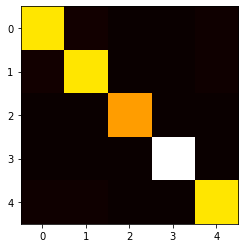

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(S, cmap='hot')
plt.show()

Si ignoramos la diagonal:

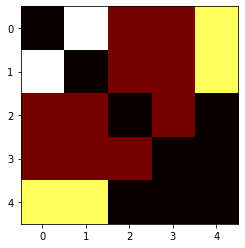

In [ ]:
plt.imshow(S-np.eye(5)*np.diag(S), cmap='hot')
plt.show()

In [ ]:
S-np.eye(5)*np.diag(S)

array([[0.        , 0.31073586, 0.04979304, 0.04979304, 0.26094282],
       [0.31073586, 0.        , 0.04979304, 0.04979304, 0.26094282],
       [0.04979304, 0.04979304, 0.        , 0.04979304, 0.        ],
       [0.04979304, 0.04979304, 0.04979304, 0.        , 0.        ],
       [0.26094282, 0.26094282, 0.        , 0.        , 0.        ]])

### <u> Consulta </u>

In [ ]:
qry = 'defecto ausencia informacion'

tf_idf_qry = term_frequency(qry, voc)*S_idf
tf_idf_qry

necesitan         0.000000
traves            0.000000
ausencia          1.609438
efectos           0.000000
defecto           1.609438
enumeracion       0.000000
digitales         0.000000
facilita          0.000000
informacion       0.510826
medios            0.000000
probabilidades    0.000000
puntos            0.000000
desarrollo        0.000000
aplicada          0.000000
ejemplos          0.000000
habilidades       0.000000
cognitivas        0.000000
limitan           0.000000
puede             0.000000
nombres           0.000000
varios            0.000000
solicitud         0.000000
procesamiento     0.000000
areas             0.000000
otra              0.000000
ninos             0.000000
usar              0.000000
clave             0.000000
cambio            0.000000
fecha             0.000000
estructuras       0.000000
actualizacion     0.000000
datos             0.000000
aumentar          0.000000
relacion          0.000000
bases             0.000000
conocimiento      0.000000
p

In [ ]:
rel = []
for i in range(1,6):
  sim = np.dot(tf_idf_qry, W['d'+str(i)])
  rel.append(sim)

pd.Series(rel, index = ['d'+str(i) for i in range(1,6)]).sort_values(ascending=False)

d5    5.441524
d1    0.260943
d2    0.260943
d3    0.000000
d4    0.000000
dtype: float64

In [ ]:
colecc['d3']

' la enumeracion de varios nombres puede aumentar las probabilidades de recuperacion '

## <font color="red"> Práctica </font>

* Forma una colección de documentos **preprocesando** los artículos de la revista *Information Architecture* disponibles en el directorio <u>information_architecture</u>. Nota: utiliza como stopwords las palabras disponibles en el archivo <u>stopwords.txt</u>
* Genera una nube de palabras con los términos de la colección formada.
* Construye la matriz tf-idf para los documentos de la colección. Puedes usar sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 
* Investiga el concepto de *similitud coseno*. 
* Identifica la pareja de artículos que tengan la mayor similitud coseno.
